In [123]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression


#  
import matplotlib.pyplot as plt
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
#Reading training data
train_data = pd.read_csv("1643662645_8986752_1567602457_1187546_train_file.dat", sep="\t", header = None)
train_data.columns = ['Sentiment', 'Review']
y_train = train_data['Sentiment']

# train_data.head()

In [110]:
#Reading test data
test_data = pd.read_csv("1643662645_9617953_1567602457_126649_test.dat", sep="\t", header = None)
test_data.columns = ['Review']

# test_data.head()

In [113]:
#Cleaning the data

#Removing punctuations from text
train_data['Review'] = train_data['Review'].str.replace(r'[^\w\s]+', '')
test_data['Review'] = test_data['Review'].str.replace(r'[^\w\s]+', '')

#removing stopwords from text
stop_words = stopwords.words('english')
train_data['Review'] = train_data['Review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
test_data['Review'] = test_data['Review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
test_data.head()




<ipython-input-113-3c4575b030b0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Review'] = train_data['Review'].str.replace(r'[^\w\s]+', '')
<ipython-input-113-3c4575b030b0>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['Review'] = test_data['Review'].str.replace(r'[^\w\s]+', '')


,Review
0,Perfect new parents We able keep track babys f...
1,Helps know exactly babies day gone mother law ...
2,I wanted alternative printing daily log sheets...
3,My 3 month old son spend half days mother half...
4,The Baby Tracker brand books absolute best tra...


In [114]:
# ps = PorterStemmer()

ls = LancasterStemmer()
train_data['Stems'] = train_data['Review'].apply(lambda x: ' '.join([ls.stem(y) for y in x.split()]))
test_data['Stems'] = test_data['Review'].apply(lambda x: ' '.join([ls.stem(y) for y in x.split()]))

# train_data['Stems'] = train_data['Review'].apply(lambda x: ' '.join([ps.stem(y) for y in x.split()]))
# test_data['Stems'] = test_data['Review'].apply(lambda x: ' '.join([ps.stem(y) for y in x.split()]))

# train_data.head()


In [115]:
# Count vectorization and TfIdf transform

count_vector = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(1,2))
# count_vector = CountVectorizer(min_df=.003, max_df=.1, ngram_range=(1,2))
count_vector

count_vector.fit(train_data.Stems)
list(islice(count_vector.vocabulary_.items(), 20))

[('book', 263),
 ('lif', 1242),
 ('sav', 1872),
 ('help', 1031),
 ('abl', 34),
 ('go', 930),
 ('track', 2336),
 ('answ', 106),
 ('quest', 1748),
 ('diff', 584),
 ('night', 1492),
 ('newborn', 1485),
 ('everyon', 740),
 ('requir', 1827),
 ('leav', 1231),
 ('hospit', 1059),
 ('went', 2547),
 ('pag', 1602),
 ('vert', 2467),
 ('mov', 1426)]

In [116]:
# len(count_vector.vocabulary_)


cvec_counts = count_vector.transform(train_data.Stems)
test_vector = count_vector.transform(train_data.Stems)


In [117]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)

test_weights = transformer.fit_transform(test_vector)
transformed_weights


<18506x2684 sparse matrix of type '<class 'numpy.float64'>'
	with 596099 stored elements in Compressed Sparse Row format>

In [118]:
regressor = LogisticRegression()
regressor.fit(transformed_weights, y_train)

prediction = regressor.predict(test_weights)




In [119]:
new_file = open('predictions.dat','w')

for element in prediction:
      new_file.write(str(element))
      new_file.write('\n')
new_file.close()

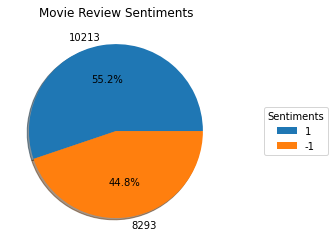

In [124]:
sentiments = Counter(prediction).keys()
sentimentsCount = Counter(prediction).values()
plt.pie(sentimentsCount, labels = sentimentsCount, shadow = True, autopct = "%1.1f%%")
plt.legend(sentiments, title = "Sentiments", loc = "center right", bbox_to_anchor = (1, 0, 0.5, 1))
plt.title("Product Reviews Distribution")
plt.show()